<a href="https://colab.research.google.com/github/dnnxl/ML-Notes/blob/master/Clustering/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Clustering is similar to classification, but the basis is different. In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.

In this part, you will understand and learn how to implement the following Machine Learning Clustering models:

- K-Means Clustering
- Hierarchical Clustering

- ## K-Means Clustering

This algoritm that allows you to cluster your data and discovery new categories

**Algorithm**
1. Choose the number K of clusters
2. Select at random K points, the centroids(not necessarily from your dataset)
3. Assign each data point to the closest entroid -> That forms K clusters
4. Compute and place the new centroid of each cluster 
5. Reassign each data point to the new closest centroid. If any reassignment took place, go to step 4, otherwise go to FIN.

Note: The new centroid is compute where the mean of all oints $x_i$ assigned to cluster j in previous step. And the distance (e.g. Euclidian) between instance $x_i$ and cluster center $c_i$

<BR>

>## K-Means Random Initialization Trap

The selection of the Centroit in the very start at the algorithm can potentially dictate the outcome of the algorithm because the centroid is selected randomly in the algorithm. And the question is how we combat this?

$Soluction -> K-Means++$

Selection at the random centroid

<BR>

> ## K-Means: Choosing the right number of cluster

**WCSS** (Within Cluster Sum of Squares) = 
<BR>

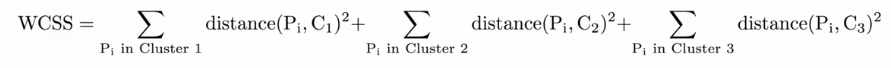

In [2]:
from google.colab import files
from IPython.display import Image
Image("WCSS.png")

**The Elbow Method**

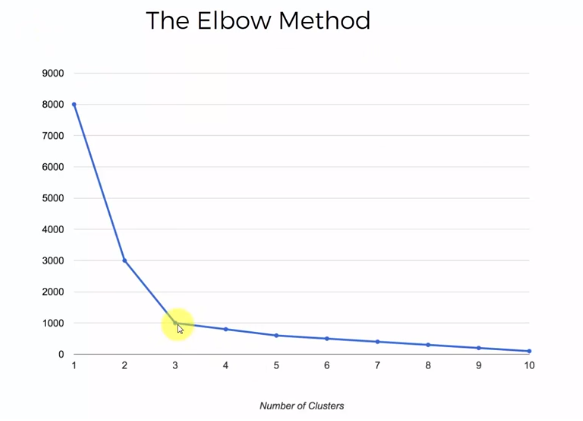

In [3]:
Image("ElbowMethod.png")

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. 

Yellow point: Optimal number of cluster

<BR>

**Python implementation**

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the mall datatset using pandas
dataset = pd.read_csv("Mall_Customers.csv")
pd.DataFrame(dataset)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
X = dataset.iloc[:,[3,4]].values
pd.DataFrame(X)

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


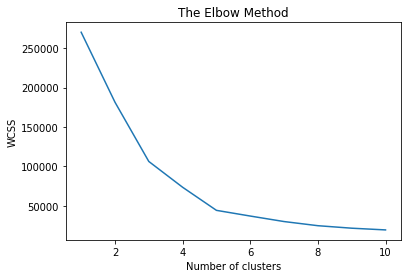

In [6]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

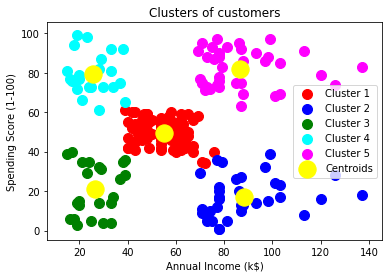

In [8]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<BR>

- ## Hierarchical Clustering

There are two types:
- Agglomerative
- Divisive

Same as K-Means but different process.

**Agglomerative HC**
1. Make each data point a single-point cluster ->That forms N clusters
2. Take the two closest data points and make them one cluster -> That forms N-1
3. Take the two closest clusters and make them one cluster -> That forms N-2
4. Repeat Step 3 intil there is only one cluster

Distance between clusters
- Option 1: Closest Points
- Option 2: Furthest Points
- Option 3: Average Distance
- Option 4: Distance Between Centroids

> ### Dendograms

Is like the memory of the HC algorithm, is going to remember every single step that we were performing.



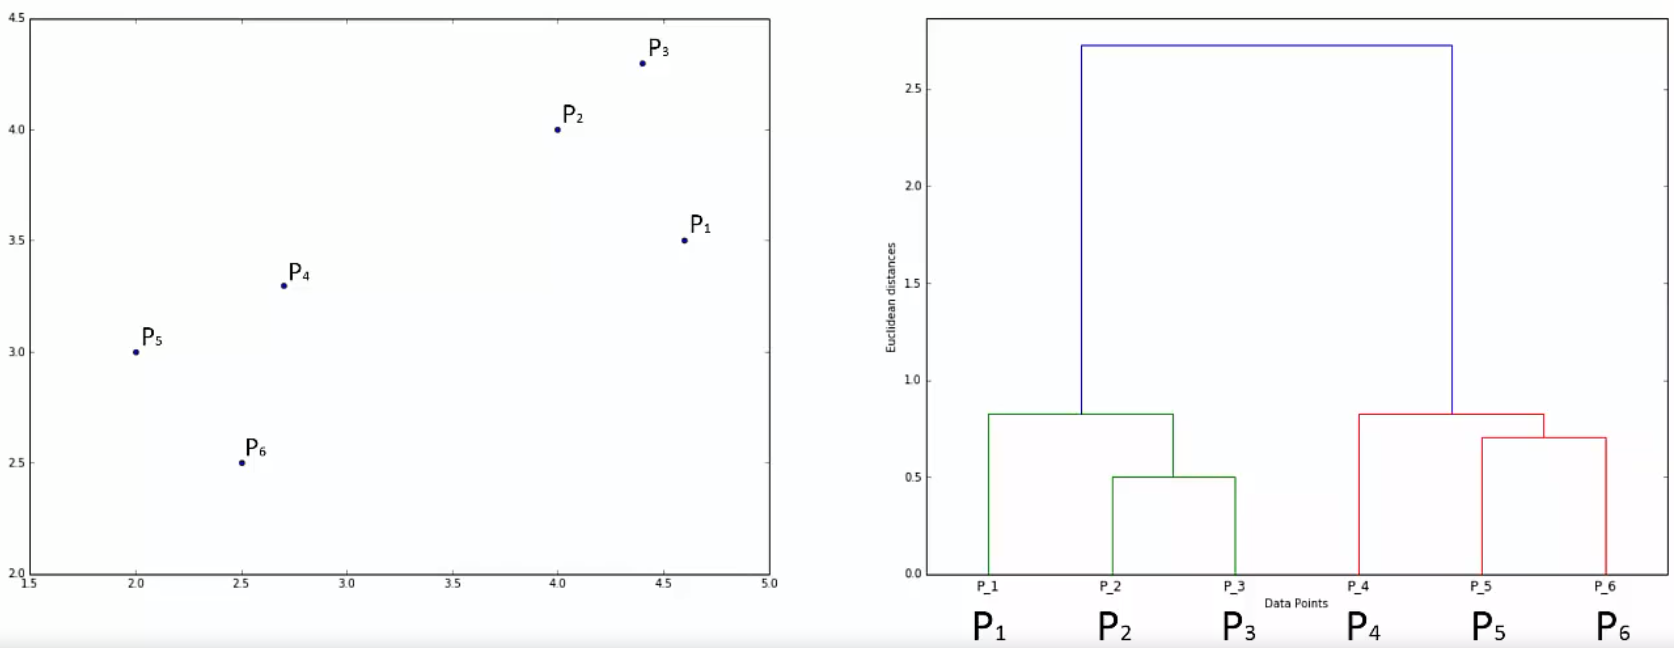

In [9]:
Image("Dendograms.png")

The height represent the euclidean distance between they

**Dissimilarity Threshold**


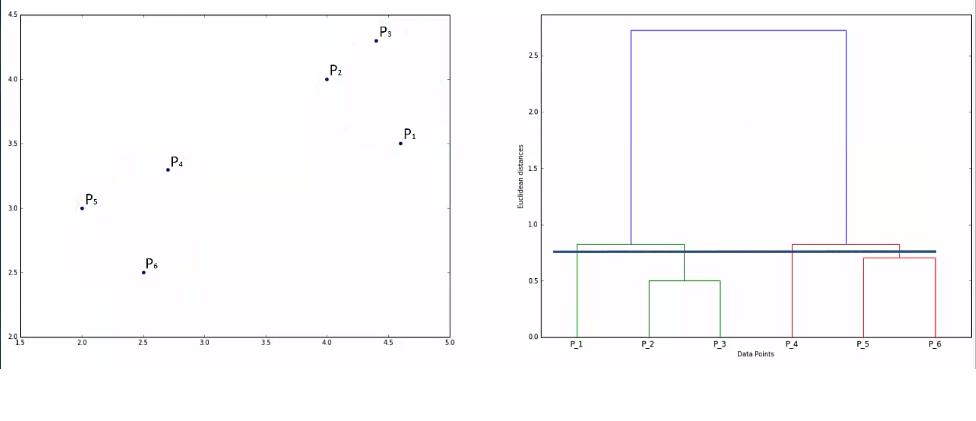

In [10]:
Image("Thresold.png")




Take a threshold that will cross this largest distance across that large distance and then use the threshold to calculate the optimal number of clusters and actually find them. (The vertical line that surpars the horizontal line)

The similarity threshold is a lower limit for the similarity of two data records that belong to the same cluster. For example, if you set the similarity threshold to 0.25, data records with field values that are 25% similar are likely to be assigned to the same cluster.
If you specify a similarity threshold of 1.0, you are insisting that, for customers to appear in the same group, their characteristics must be identical. You might have a large number of customer characteristic variables, or the variables might take a wide range of values. In this case, you would probably end up with each customer in a separate segment. At the other extreme is what happens if you set the similarity threshold to zero. In that case, you would end up with one large cluster containing all of your customers, because all of them become candidates. The right setting is somewhere in between, but where? You have to preserve a balance between the number of clusters that is acceptable and the degree of similarity.

There is another important factor that the Distribution-based Clustering algorithm has to consider. Even if a customer has an acceptable similarity to an existing group of customers, this does not automatically mean that they will go into the same cluster. There may be other customer groups where the match is better. The Distribution-based Clustering algorithm finds the optimum combination of customers that maximizes the similarity of all the customers within each cluster. At the same time, it maximizes the dissimilarity between the clusters it produces. To decide that, it tries to maximize the value of a statistic that it calculates, the Condorcet value.

A situation might occur where you try to give the Distribution-based Clustering algorithm a similarity threshold, and you do not limit the number of clusters that it can produce. In this case, it will keep trying to find the minimum number of clusters that satisfy the similarity threshold, because this also maximizes the Condorcet value. In a different situation, you might have limited the number of clusters with the result that, after all the possible clusters are created, a record does not have a similarity above the threshold with any of them. In this case, the record will be assigned to the cluster with the best similarity, even if the similarity threshold is not reached.

Link: https://www.ibm.com/support/knowledgecenter/en/SSEPGG_9.5.0/com.ibm.datatools.datamining.doc/c_similarity_threshold.html

<BR>
**Python implementatiom**

In [11]:
# Importing the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the mall dataset
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3,4]].values
pd.DataFrame(dataset)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


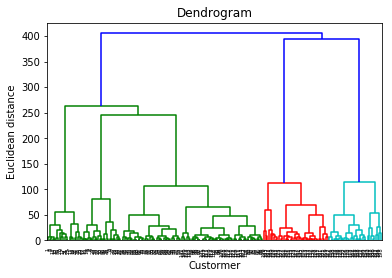

In [12]:
# Using the dendogram to find the optimal number of cluster
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward")) #Ward method that tries to minimize the variance within each cluster
plt.title("Dendrogram")
plt.xlabel("Custormer")
plt.ylabel("Euclidean distance")
plt.show()

In [13]:
# Fitting hierarchial clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

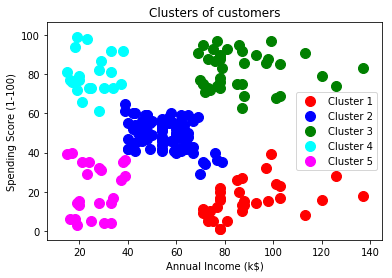

In [14]:
# Visualising the Clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()